In [1]:
!pip install pandas

In [2]:
!pip freeze

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.3
astropy-iers-data==0.2024.9.16.0.32.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.17.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.3
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
con

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
# Ruta completa del archivo en tu Google Drive
file_path = '/content/drive/MyDrive/Proyecto BEDU/all_stocks_5yr.csv'
# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [5]:
#Comprobación de la correcta información del .csv
try:
    df = pd.read_csv(file_path)
    print("El archivo se cargó correctamente.")
     # Verificar si el archivo tiene valores nulos
    if df.isnull().values.any():
        # Eliminar filas con cualquier valor nulo
        df_sin_nulos_filas = df.dropna() #quita valores nulos
        # Eliminar columnas con cualquier valor nulo
        df_sin_nulos_columnas = df.dropna(axis=1) #axis 1 se refiere a columnas
        print("El archivo CSV se limpio de valores nulos.")
    else:
        print("El archivo CSV no tiene valores nulos.")
    # Verificar si hay filas duplicadas
    if df.duplicated().any():
        print("El archivo CSV contiene filas duplicadas.")
    else:
        print("El archivo CSV no tiene filas duplicadas.")

except Exception as e:
    print(f"Error al cargar el archivo: {e}") #e imprimira el mensaje de error que arroje
df.head()
#df = pd.read_csv('all_stocks_5yr.csv')
#Open = a que precio inicio la accion al abrir el dia
#high = el maximo al que llego en el dia
#low = el minimo al que llego en el dia
#close = a que precio quedo al cerrar
#volume = volumen de acciones en circulacion/cantidad de acciones a la venta
#Name = nombre de la compañia

El archivo se cargó correctamente.
El archivo CSV se limpio de valores nulos.
El archivo CSV no tiene filas duplicadas.


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
#Checando el tipo de datos de cada columna
print(df.dtypes)
#object se refiere a la combinación entre string y cualquier valor no numerico

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [7]:
# Convertir la columna 'date' a tipo datetime, ya que para obtener el periodo de años no se puede usar object
df['date'] = pd.to_datetime(df['date'], errors='coerce')
#Convierte la columna 'date' a formato de fecha
#El argumento errors='coerce' convertirá cualquier valor no válido en NaT (Not a Time)
# Obtener el año más antiguo y el más reciente
año_inicio = df['date'].dt.year.min()
año_fin = df['date'].dt.year.max()
#df['date'].dt.year: Extrae el año de cada fecha
# Imprimir el rango de años
print(f"El periodo de los datos es de {año_inicio} a {año_fin}.")

El periodo de los datos es de 2013 a 2018.


In [8]:
#Nombres de las compañias/stock
company = df['Name'].unique()  #se encuentra cada dato 'unico' dentro de la columna Name
company

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [9]:
#DataFrame para cada empresa
company_name = ['AAPL','XEC','TGT']  # Lista de empresas a filtrar
df_company = df[df['Name'].isin(company_name)] # verifica si el valor de la columna Name se encuentras en la lista de empresas
df_company.head()
df_company.tail()

,date,open,high,low,close,volume,Name
605186,2018-02-01,113.04,115.59,111.97,113.41,1076052,XEC
605187,2018-02-02,112.20,112.20,109.80,110.95,1162116,XEC
605188,2018-02-05,110.23,111.89,107.83,107.91,1186573,XEC
605189,2018-02-06,107.82,110.20,105.96,108.46,1224614,XEC
605190,2018-02-07,108.44,110.24,105.71,105.91,1385702,XEC


In [10]:
# Encuentra el día con el valor de apertura más alto
highest_open = df_company.loc[df_company.groupby('Name')['open'].idxmax()] # encuentra el valor mas alto dentro del campo 'open'
#idxmax() encuentra el índice de las filas donde el valor de la columna open es el más alto para cada empresa.
#loc[] se usa para seleccionar las filas completas basadas en los índices obtenidos con idxmax()
print("Dia con el valor de apertura más alto:")
print(highest_open[['date', 'open', 'high', 'low','Name']]) # imprime las columnas especificadas

Dia con el valor de apertura más alto:
             date    open    high     low  Name
2503   2018-01-18  179.37  180.10  178.25  AAPL
536163 2015-07-16   84.75   85.31   84.50   TGT
604298 2014-07-24  148.92  150.71  147.42   XEC


In [11]:
# Encuentra el día con el valor de apertura más bajo
lowest_close = df_company.loc[df_company.groupby('Name')['close'].idxmin()] # encuentra el valor mas bajo dentro del campo 'open'
#idxmax() encuentra el índice de las filas donde el valor de la columna close es el más bajo para cada empresa.
print("Dia con el valor de apertura más bajo:")
print(lowest_close[['date', 'high', 'low', 'close','Name']])

Dia con el valor de apertura más bajo:
             date     high      low    close  Name
1307   2013-04-19  57.0857  55.0142  55.7899  AAPL
536662 2017-07-10  51.1700  50.0400  50.1800   TGT
603947 2013-03-04  65.4400  63.1200  63.6700   XEC


In [12]:
#Combinar resultados MERGE
resultado = pd.concat([highest_open, lowest_close], keys=['Más alto', 'Más bajo'])
#pd.concat concatena ambos dataframes
#keys es un argumento para añadir etiquetas que permitan distinguir entre los valores
print("Días de apertura más alta y cierre más bajo para", company_name)
print(resultado[['date', 'open', 'high', 'low', 'close','Name']])

Días de apertura más alta y cierre más bajo para ['AAPL', 'XEC', 'TGT']
                      date      open      high       low     close  Name
Más alto 2503   2018-01-18  179.3700  180.1000  178.2500  179.2600  AAPL
         536163 2015-07-16   84.7500   85.3100   84.5000   85.0100   TGT
         604298 2014-07-24  148.9200  150.7100  147.4200  148.7700   XEC
Más bajo 1307   2013-04-19   55.4242   57.0857   55.0142   55.7899  AAPL
         536662 2017-07-10   51.1500   51.1700   50.0400   50.1800   TGT
         603947 2013-03-04   65.2900   65.4400   63.1200   63.6700   XEC


In [13]:
# Ver tendencia en el valor de apertura
# Ordenar por la columna 'open' en orden descendente
df_ordenado = df_company.groupby('Name').apply(lambda x: x.sort_values(by='open', ascending=False))
#apply() aplica la funcion lamba a cada grupo de datos
#lambda x es una funcion cualquiera que
#junto con sort_values ordena los valores de 'close' en cada grupo en orden descendente.
# Imprimir los resultados
print("Los valores más altos de las 3 empresas son:")
print(df_ordenado)

Los valores más altos de las 3 empresas son:
                  date    open    high       low   close    volume  Name
Name                                                                    
AAPL 2503   2018-01-18  179.37  180.10  178.2500  179.26  31193352  AAPL
     2504   2018-01-19  178.61  179.58  177.4100  178.46  32425067  AAPL
     2501   2018-01-16  177.90  179.39  176.1400  176.19  29565947  AAPL
     2506   2018-01-23  177.30  179.44  176.8200  177.04  32689146  AAPL
     2505   2018-01-22  177.30  177.78  176.6016  177.00  27108551  AAPL
...                ...     ...     ...       ...     ...       ...   ...
XEC  604025 2013-06-24   65.31   65.56   62.9800   64.72   1610617   XEC
     603947 2013-03-04   65.29   65.44   63.1200   63.67    934770   XEC
     603949 2013-03-06   65.18   65.49   64.6500   65.01    842687   XEC
     603950 2013-03-07   65.10   67.57   65.0000   67.49    711324   XEC
     603948 2013-03-05   64.28   65.23   64.1600   64.86    837175   XEC

[3777

In [14]:
# Ver tendencia en el valor de cierre

# Ordenar por la columna 'cierre' en orden descendente
df_ordenado_cierre = df_company.groupby('Name').apply(lambda x: x.sort_values(by='close', ascending=False))
#apply() aplica la funcion lamba a cada grupo de datos
#lambda x es una funcion cualquiera que
#junto con sort_values ordena los valores de 'close' en cada grupo en orden descendente.
# Imprimir los resultados
print("Los valores más altos de las 3 empresas son:")
print(df_ordenado_cierre)

Los valores más altos de las 3 empresas son:
                  date    open     high     low   close    volume  Name
Name                                                                   
AAPL 2503   2018-01-18  179.37  180.100  178.25  179.26  31193352  AAPL
     2502   2018-01-17  176.15  179.250  175.07  179.10  34386836  AAPL
     2504   2018-01-19  178.61  179.580  177.41  178.46  32425067  AAPL
     2500   2018-01-12  176.18  177.360  175.65  177.09  25418080  AAPL
     2506   2018-01-23  177.30  179.440  176.82  177.04  32689146  AAPL
...                ...     ...      ...     ...     ...       ...   ...
XEC  604029 2013-06-28   65.40   66.270   64.99   64.99   1018271   XEC
     603937 2013-02-15   67.08   67.116   64.81   64.95   1198298   XEC
     603948 2013-03-05   64.28   65.230   64.16   64.86    837175   XEC
     604025 2013-06-24   65.31   65.560   62.98   64.72   1610617   XEC
     603947 2013-03-04   65.29   65.440   63.12   63.67    934770   XEC

[3777 rows x 7 col

In [15]:
# Ver tendencia en el valor de volumen

# Ordenar por la columna 'volume' en orden descendente
df_ordenado_volumen = df_company.groupby('Name').apply(lambda x: x.sort_values(by='volume', ascending=False))
#apply() junto con una función lambda que ordena los valores de 'volume' en cada grupo en orden descendente.
# Imprimir los resultados
print("Los valores más altos de las 3 empresas son:")
print(df_ordenado_volumen)

Los valores más altos de las 3 empresas son:
                  date      open      high       low     close     volume  \
Name                                                                        
AAPL 1502   2014-01-28   72.6799   73.5714   71.7242   72.3571  266833581   
     1310   2013-04-24   56.2199   59.3214   56.0714   57.9231  242387530   
     1305   2013-04-17   60.0385   60.0857   56.8728   57.5428  236138966   
     1407   2013-09-11   66.7157   67.6699   66.4014   66.8156  224250866   
     1387   2013-08-13   67.2771   70.6656   66.8642   69.9385  219634975   
...                ...       ...       ...       ...       ...        ...   
XEC  604638 2015-11-27  119.2400  120.5350  116.9300  118.0300     357351   
     605140 2017-11-24  116.7700  117.1400  116.0900  116.5200     339790   
     604153 2013-12-24  103.0000  103.5800  102.5500  103.4500     316761   
     604909 2016-12-23  136.5100  137.3300  135.2600  135.7200     302255   
     604154 2013-12-26  103.780

In [16]:
# Agrupar por Empresa y obtener el día con el precio de apertura más alto para cada empresa
grouped = df_company.groupby('Name').apply(lambda x: x.loc[x['open'].idxmax()]) #lamba Aplica una función
#que selecciona la fila con el valor máximo de 'open' dentro de cada grupo (cada empresa).

# Mostrar los resultados agrupados
print("Día con el precio de apertura más alto para cada empresa:")
print(grouped[['Name', 'date', 'open', 'high', 'low', 'close', 'volume']])

Día con el precio de apertura más alto para cada empresa:
      Name       date    open    high     low   close    volume
Name                                                           
AAPL  AAPL 2018-01-18  179.37  180.10  178.25  179.26  31193352
TGT    TGT 2015-07-16   84.75   85.31   84.50   85.01   2972005
XEC    XEC 2014-07-24  148.92  150.71  147.42  148.77   1497005


In [17]:
# Agrupar por empresa y obtener estadísticas del precio de apertura
grouped_stats = df_company.groupby('Name').agg({ # Aplica múltiples funciones agregadas (como mean, max, min) a las columnas seleccionadas.
    'open': ['mean', 'max', 'min'],  # Agregar estadísticas de apertura
    'close': ['mean', 'max', 'min'],  # Agregar estadísticas de cierre
    #'volume': ['mean', 'sum']  # Volumen promedio y suma total
})

# Mostrar estadísticas agregadas
print("Estadísticas agregadas por empresa:")
print(grouped_stats)

Estadísticas agregadas por empresa:
            open                        close                 
            mean     max      min        mean     max      min
Name                                                          
AAPL  109.055429  179.37  55.4242  109.066698  179.26  55.7899
TGT    67.828209   84.75  50.2300   67.840365   85.01  50.1800
XEC   109.519708  148.92  64.2800  109.534186  148.77  63.6700


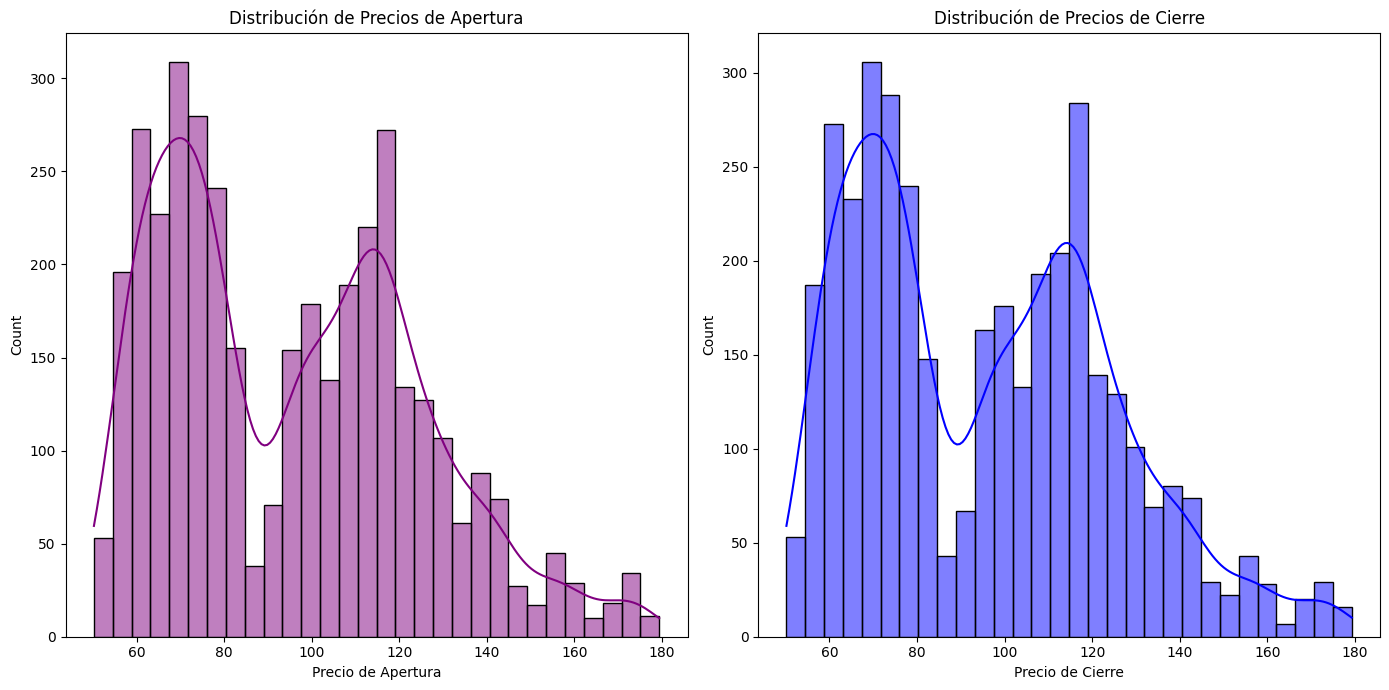

In [26]:
'''
GRÁFICAS PARA MEJORAR LA VISUALIZACIÓN DE LOS DATOS ANTERIORMENTE MOSTRADOS
'''
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Distribución de precios de apertura y cierre
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(df_company['open'], bins=30, kde=True, color='purple')
plt.title('Distribución de Precios de Apertura')
plt.xlabel('Precio de Apertura')

plt.subplot(1, 2, 2)
sns.histplot(df_company['close'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios de Cierre')
plt.xlabel('Precio de Cierre')

plt.tight_layout()
plt.show()


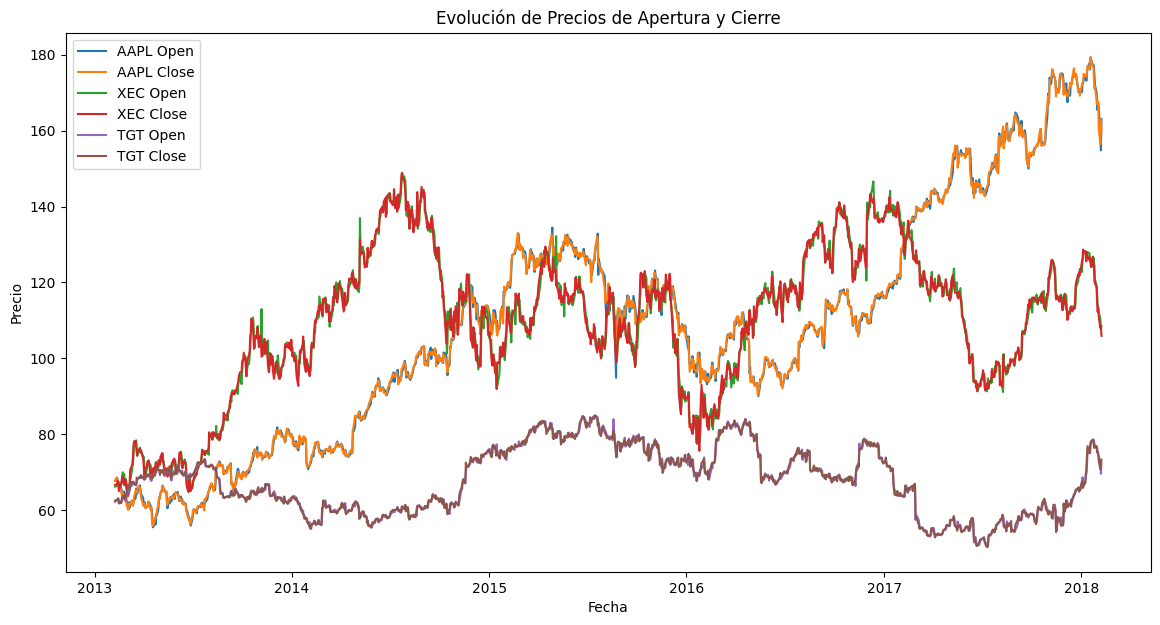

In [20]:
# 2. Evolución del precio de apertura y cierre a lo largo del tiempo
plt.figure(figsize=(14, 7))

for name in company_name:
    subset = df_company[df_company['Name'] == name]
    plt.plot(subset['date'], subset['open'], label=f'{name} Open')
    plt.plot(subset['date'], subset['close'], label=f'{name} Close')

plt.title('Evolución de Precios de Apertura y Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

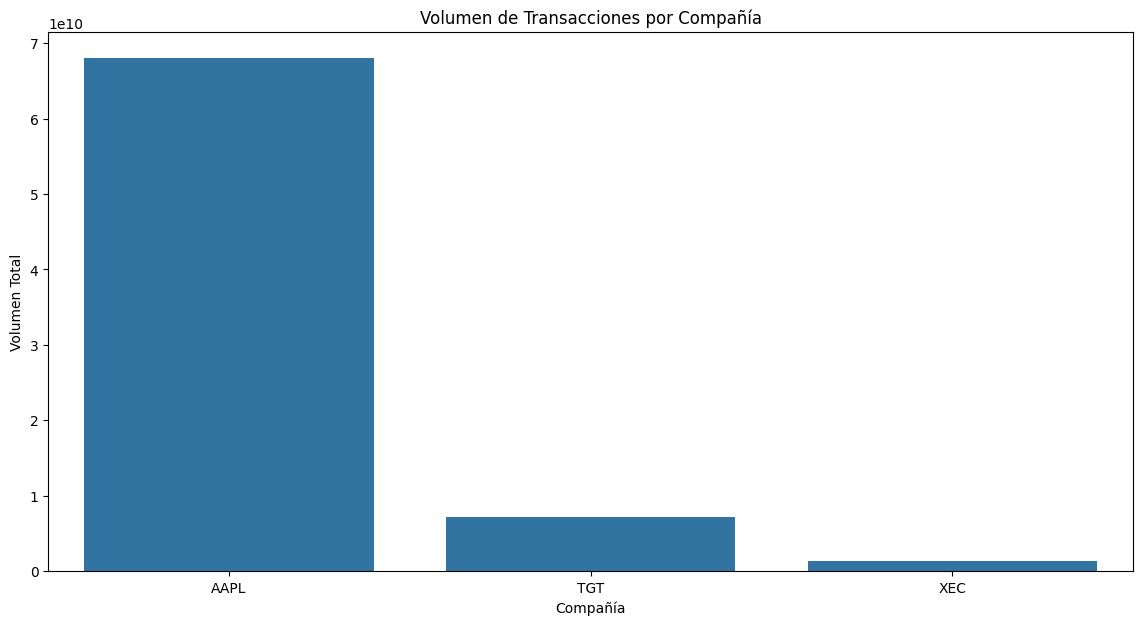

In [21]:
# 3. Volumen de transacciones por compañía
plt.figure(figsize=(14, 7))
sns.barplot(x='Name', y='volume', data=df_company, estimator=sum, errorbar=None)
plt.title('Volumen de Transacciones por Compañía')
plt.xlabel('Compañía')
plt.ylabel('Volumen Total')
plt.show()